In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [102]:
data=pd.read_csv("ML_TASK01_IP.csv")
data.head(10)

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
5,188.00,2221,Under Construction,3,3.0,0.0,Virugambakkam,Traventure Homes Pvt Ltd
6,38.00,885,Under Construction,3,NaN,0.0,Thirumazhisai,Urbanrise
7,72.99,936,Ready to move,3,NaN,6.0,Moolakadai,Navin Housing Properties P LTD
8,125.00,2275,Ready to move,4,NaN,1.0,Ottiyambakkam,Jones foundation private limited
9,24.56,622,Under Construction,2,NaN,0.0,Perungalathur,Isha Homes


In [103]:
data.isna().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [104]:
data.shape

(2620, 8)

In [105]:
data=data.dropna(subset=["bathroom"])

In [106]:
data.isna().sum()

price         0
area          0
status        0
bhk           0
bathroom      0
age         823
location      0
builder       0
dtype: int64

In [107]:
data.shape

(1403, 8)

In [108]:
data.columns

Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location',
       'builder'],
      dtype='object')

In [109]:
data.describe

<bound method NDFrame.describe of        price  area              status  bhk  bathroom  age       location  \
1      93.54  1346  Under Construction    3       2.0  NaN       Selaiyur   
3      49.00  1028       Ready to move    2       2.0  3.0       Ambattur   
4      42.28   588  Under Construction    2       1.0  0.0     Pallavaram   
5     188.00  2221  Under Construction    3       3.0  0.0  Virugambakkam   
11    240.00  1500       Ready to move    3       3.0  1.0     Anna Nagar   
...      ...   ...                 ...  ...       ...  ...            ...   
2615   27.50   750       Ready to move    2       2.0  3.0    Veppampattu   
2616   27.50   750       Ready to move    2       2.0  3.0    Veppampattu   
2617   30.00   800       Ready to move    2       2.0  3.0    Veppampattu   
2618   31.50   850       Ready to move    2       2.0  3.0    Veppampattu   
2619   34.00   900       Ready to move    2       2.0  3.0    Veppampattu   

                                   builde

In [110]:
temp= data[['price', 'area', 'status', 'bhk', 'bathroom']].values
st = preprocessing.LabelEncoder()
st.fit(['Under Construction','Ready to move'])
temp[:,2] = st.transform(temp[:,2])
temp[0:10]

array([[93.54, 1346, 1, 3, 2.0],
       [49.0, 1028, 0, 2, 2.0],
       [42.28, 588, 1, 2, 1.0],
       [188.0, 2221, 1, 3, 3.0],
       [240.0, 1500, 0, 3, 3.0],
       [113.0, 2343, 0, 4, 4.0],
       [50.76, 1045, 0, 2, 2.0],
       [57.5, 920, 1, 2, 1.0],
       [42.28, 588, 1, 2, 1.0],
       [50.21, 1152, 0, 2, 3.0]], dtype=object)

In [111]:
x = temp[:,1:]
x[0:10]

array([[1346, 1, 3, 2.0],
       [1028, 0, 2, 2.0],
       [588, 1, 2, 1.0],
       [2221, 1, 3, 3.0],
       [1500, 0, 3, 3.0],
       [2343, 0, 4, 4.0],
       [1045, 0, 2, 2.0],
       [920, 1, 2, 1.0],
       [588, 1, 2, 1.0],
       [1152, 0, 2, 3.0]], dtype=object)

In [112]:
y=temp[:,0]
y[0:10]

array([93.54, 49.0, 42.28, 188.0, 240.0, 113.0, 50.76, 57.5, 42.28, 50.21],
      dtype=object)

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [114]:
x_train.shape

(982, 4)

In [115]:
x_test.shape

(421, 4)

In [116]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

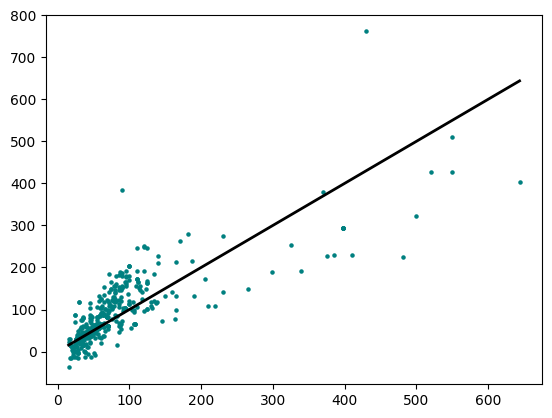

In [132]:
plt.scatter(y_test, y_pred, color="teal", s= 5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linewidth=2)
plt.show()


In [118]:
print(metrics.root_mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

54.85167901279702
0.6401311022708126


In [119]:
print(y_pred.shape)
print(y_test.shape)

(421,)
(421,)


In [120]:
# Convert the numpy arrays to a pandas DataFrame
y_pred_df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

# Save the DataFrame to a CSV file
y_pred_df.to_csv("ML_TASK01_OP.csv", index=False)